# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* FOUZIA Elaouni

# Introduction

Dans ce travail, nous examinerons les données du marché boursier, en particulier celles des firmes technologique. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG).Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# 1 Chargement du jeu de données et traitement des données

## Installation du module pandas_datareader

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

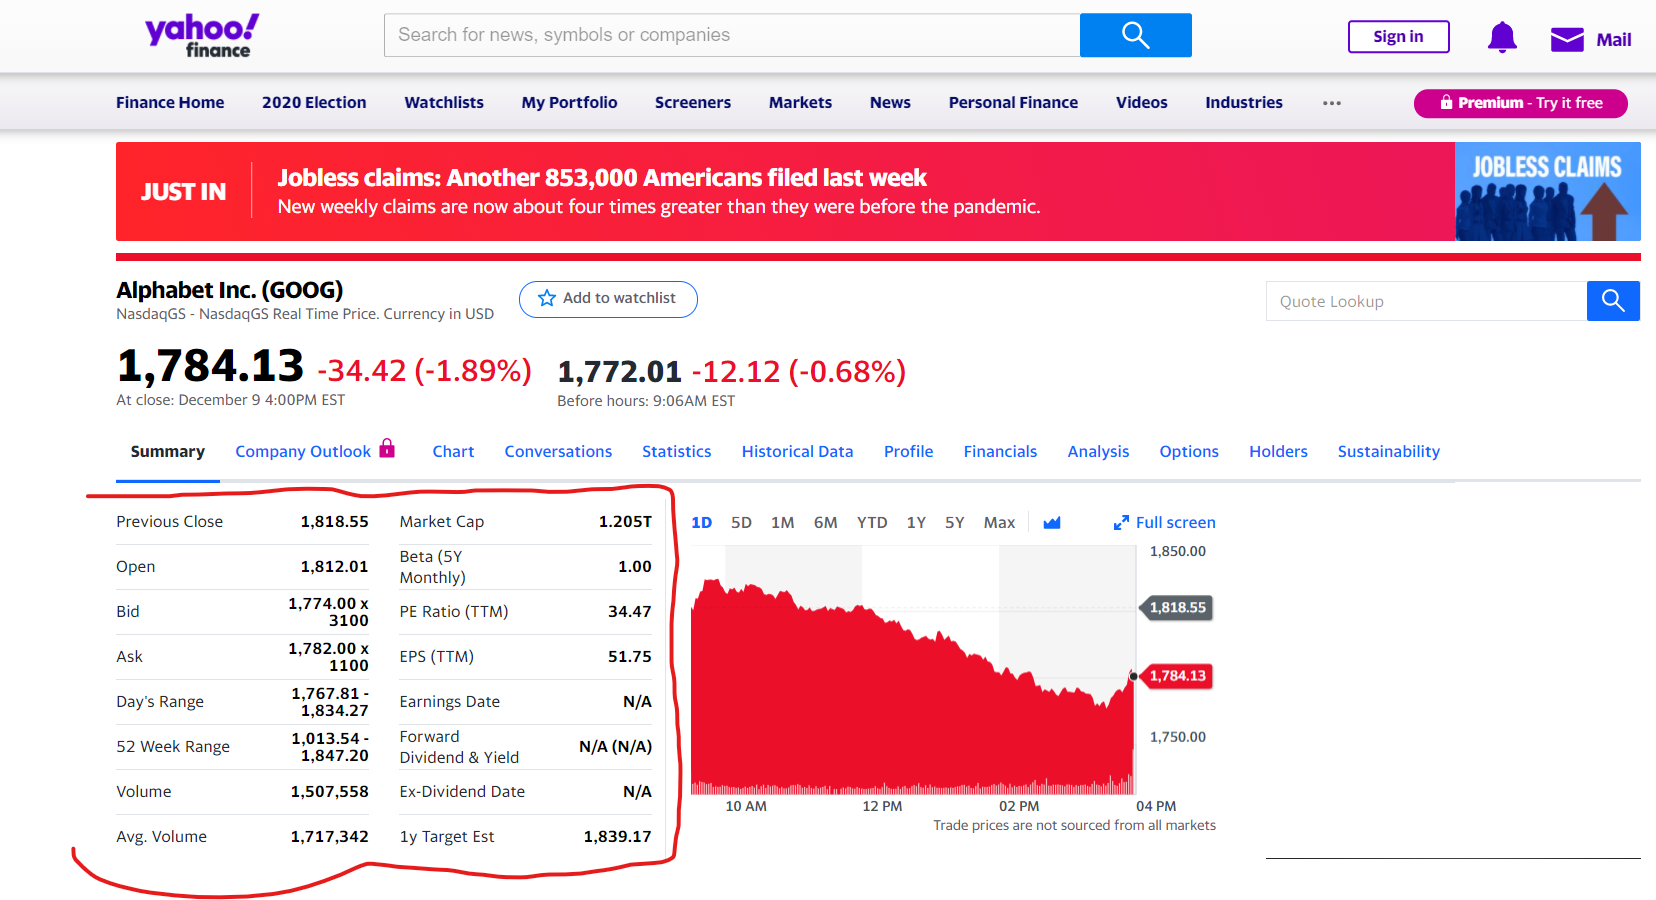

In [14]:
from IPython.display import Image
Image("img_yahoo_finance.png")

In [12]:
import sys
!{sys.executable} -m pip install pandas_datareader

## Récupération des données

In [8]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !
from datetime import datetime #gestion de dates

### récupération des séries temporelles des cours des actions pour chaque firme de la tech

In [25]:
# liste des firmes de la tech
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

# date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
fin = datetime.now()
debut = datetime(end.year - 1, end.month, end.day)

# récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
for stock in FAANG :   
    globals()[stock] = DataReader(stock, 'yahoo', debut, fin)

#### 2 exemples du format des données

Nous avons récupérés au total 5 séries temporelles : celles de FB, AAPL, AMZN, NFLX et GOOG. Chaque séries temporelles contient 5 variables : 
* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj
* Volume =
* Adj Close =

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [35]:
FB.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-11,175.880005,167.660004,174.009995,170.240005,20373900,170.240005
2020-06-12,231.660004,224.500000,229.899994,228.580002,22071700,228.580002
2020-08-04,252.800003,247.429993,251.559998,249.830002,17183500,249.830002
2020-04-08,175.000000,167.740005,171.250000,174.279999,21664200,174.279999
2020-05-29,227.490005,222.880005,225.199997,225.089996,23322500,225.089996


In [36]:
AAPL.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-04,81.404999,80.195000,81.097504,80.580002,21890100.0,80.296448
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-06-01,80.587502,79.302498,79.437500,80.462502,20197800.0,80.179359
2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,92.289093
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,128.817749


#### constitution de données de panel

A partir des 5 séries temporelles récupérées, nous constituons des données de panel en concatenant ces séries.

In [39]:
liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

for firme, nom in zip(liste_firme, nom_firme):
    firme["Nom firme"] = nom
    
data = pd.concat(liste_firme, axis = 0)

Données finales :

In [43]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-10,202.050003,200.149994,201.660004,200.869995,9475700.0,200.869995,FACEBOOK
2019-12-11,202.630005,200.279999,200.279999,202.259995,8036800.0,202.259995,FACEBOOK
2019-12-12,203.660004,194.100006,202.350006,196.750000,23734800.0,196.750000,FACEBOOK
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-04,1833.160034,1816.989990,1824.520020,1827.989990,1378200.0,1827.989990,GOOGLE
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE


# 3. Statistique descriptive

# 4. Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# 5. Modélisation

# Conclusion